## 1. Importación y carga de datos

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from functools import reduce
from scipy.stats import probplot

In [2]:
# Correr para crear pickle de data
# Guardar Copia de PAE_2019.xlsx en carpeta Data (El archivo es muy grande para subirse a github)

folder = 'Data'
ruta_pickle = 'DATA_JUNAEB2019.pkl'

path = os.path.join(folder, 'Copia de PAE_2019.xlsx')
data = pd.read_excel(path)

path_pickle = os.path.join(folder, ruta_pickle)
with open(path_pickle, 'wb') as archivo:
    pickle.dump(data, archivo)

In [2]:
folder = 'Data'
ruta_pickle = 'DATA_JUNAEB2019.pkl'

path_pickle = os.path.join(folder, ruta_pickle)

path = os.path.join(path_pickle)
with open(path, 'rb') as file:
    data = pickle.load(file)

path = os.path.join(folder, 'Colegios(Continental)2020.xlsx')
schools = pd.read_excel(path)

In [3]:
data.columns.values

array(['Unnamed: 0', 'InstituciÃ³n', 'RUTEmpresa', 'Tipo',
       'Concesionario', 'Nombre', 'Anno', 'Mes', 'Licitacion',
       'LineadeProducto', 'Region', 'Provincia', 'Nombre_A', 'Comuna',
       'Nombre_B', 'Ute', 'Rbd', 'dv', 'Nombre_C', 'Direccion',
       'Programa', 'Servicio', 'Estrato', 'Nivel', 'TC', 'Cocina',
       'RacEqJunaeb', 'RacEqJecd', 'Precio', 'PrecioPlus', 'DiasASI',
       'TotalRacEqAsigMes', 'Decimo$', 'DiasServidos', 'RacEqRealJunaeb',
       'RacEqRealJecd', 'TotalRacEqRealMes', 'TotalRacEqPagadas',
       'TotalRacIncompletas', 'Tramo', 'Precio$Aju', 'Plus$Aju',
       'RacIncompletas$', 'TotalServidas$', 'TotalNoServidas$',
       'RealTotal$', 'Folio', 'RacionesNoServidasPagodeExcepcion50',
       'Diasal50', 'RacionesNoServidasPagodeExcepcion30', 'Diasal30',
       'Dependencia', 'Sector', 'Acceso', 'IVE', 'Matricula', 'ESTASI',
       'ESTAJU', 'Inactiva', 'CodRacNoServ', 'SIGE', 'RBDMINEDUC',
       'DVMINEDUC', 'DiasCertificados', 'CompensaciÃ³n',
  

## 2. Arreglo y preprocesamiento

In [4]:
data.rename(columns = {'InstituciÃ³n':'Institución', 'Ute':'UT_2019'}, inplace=True)

In [5]:
data['Servicio'] = data['Servicio'].str.strip()
data = data[data['Institución'] == 'JU'] # Seleccionar data JUNAEB

rbds = list(schools.RBD.values)
services = data.Servicio.unique()

In [6]:
data.TotalRacEqAsigMes.dtype

dtype('int64')

In [7]:
data['Precio']

0         1338.833
1         1192.313
2         1572.805
3         1338.833
4         1192.313
            ...   
577394     752.678
577395    1084.403
577396     784.835
577397     766.243
577398     766.243
Name: Precio, Length: 577399, dtype: float64

In [8]:
#data['Precio$Aju'] = data['Precio$Aju'].replace(' ', 0)
#data[data['Precio$Aju']==' ']['Nivel'].unique()

In [9]:
#data['PrecioPorRacion'] = data['RealTotal$Pagado']/data['TotalRacEqPagadas']
#data['PrecioPorRacion'] = data['PrecioPorRacion'].replace(np.NaN, 0)
#data['PrecioPorRacion'] = data['PrecioPorRacion'].replace(np.inf, 0)

In [10]:
#data_fil = data[data['PrecioPorRacion']<50000]

In [11]:
data['UT_2019']

0          3
1          3
2          3
3          3
4          3
          ..
577394    18
577395    18
577396    18
577397    18
577398    18
Name: UT_2019, Length: 577399, dtype: int64

In [12]:
data[data['Rbd']==7629][['UT_2019', 'Rbd']]

,UT_2019,Rbd
2201,3,7629
2202,3,7629
2203,3,7629
3991,3,7629
3992,3,7629
3993,3,7629
29248,6,7629
29249,6,7629
29250,6,7629
82662,6,7629


In [13]:
# Ut_per_rbd = data[['UT_2019','Rbd']].groupby(by=["Rbd"]).std()
# Ut_per_rbd[(Ut_per_rbd != 0).values]

Ut_per_rbd = data[['UT_2019','Rbd', 'RUTEmpresa']].groupby(by=['RUTEmpresa']).std()
Ut_per_rbd[(Ut_per_rbd != 0).values].head()
# condition = Ut_per_rbd % 1 != 0
# Ut_per_rbd[condition]

,UT_2019,Rbd
RUTEmpresa,,
12.448.813-3,0.000000,68603.415564
76.050.335-5,0.662043,212846.174893
76.050.335-5,0.662043,212846.174893
76.072.523-4,0.000000,81944.400444
76.105.050-8,0.778960,158234.032838


In [14]:
print(services)

['O' 'D' 'A' 'C' 'T' 'DCO' 'S/I' 'ACO' 'DCE' 'ACE']


In [15]:
print(rbds)

[2419, 11287, 887864, 8325, 887991, 2532, 2660, 8391, 887874, 887974, 18, 78, 204, 10915, 885060, 886727, 887189, 887928, 887953, 3999, 4195, 887850, 4104, 17897, 993096, 883763, 1233, 40352, 1185, 1433, 1448, 887147, 8458, 2116, 2129, 2139, 2140, 2143, 2223, 2243, 2246, 2264, 2266, 2279, 2294, 2311, 2324, 2328, 2330, 2375, 2379, 2387, 2413, 2414, 2423, 2428, 8564, 9987, 9994, 9998, 10001, 10006, 10077, 10080, 10085, 10090, 10100, 10104, 10113, 10120, 10134, 10409, 15753, 15762, 25047, 25315, 25642, 26157, 40024, 887975, 887996, 5216, 5220, 5224, 5225, 5228, 5248, 5273, 5284, 5289, 5333, 5363, 5382, 5394, 5396, 5434, 5440, 5510, 5538, 5539, 5548, 5550, 5580, 5823, 5824, 5825, 5827, 5828, 5829, 5831, 5832, 5833, 5880, 6066, 6084, 6085, 6086, 6089, 6090, 6092, 6108, 6164, 6227, 6270, 6272, 6285, 6304, 6350, 6352, 6398, 6456, 6471, 6586, 6587, 6589, 6604, 6652, 6708, 6710, 6711, 6712, 6718, 6721, 6726, 6731, 11520, 16941, 19902, 19906, 19913, 19952, 19993, 20121, 20200, 885300, 887842, 88

In [16]:
raciones = {ser: [] for ser in services}
raciones['UT_2019'] = []
raciones['empresa'] = []
precios = {ser: [] for ser in services}
total_pagado = {ser: [] for ser in services}
unitary_prices = {ser: [] for ser in services} # auxiliar para gráficar

for rbd in rbds:
    selected_data = data[data['Rbd'] == rbd]
    hay_servicio = False
    for ser in services:
        if ser in selected_data['Servicio'].unique():
            hay_servicio = True
            raciones_servicio = selected_data[selected_data['Servicio'] == ser]['TotalRacEqAsigMes']
            precios_servicio = selected_data[selected_data['Servicio'] == ser]['Precio']
            pagado_servicio = (precios_servicio*raciones_servicio).sum()

            if raciones_servicio.sum() != 0:
                raciones[ser].append(raciones_servicio.sum())
                precios[ser].append(pagado_servicio/raciones_servicio.sum()) # Promedio ponderado de precio_por_racion
                total_pagado[ser].append(pagado_servicio)
                unitary_prices[ser].append((pagado_servicio/raciones_servicio.sum(), raciones_servicio.sum()))
            else:
                raciones[ser].append(0)
                precios[ser].append(0)
                total_pagado[ser].append(0)
                unitary_prices[ser].append((0,0))
        else:
            raciones[ser].append(0)
            precios[ser].append(0)
            total_pagado[ser].append(0)
            unitary_prices[ser].append((0,0))
    
    if hay_servicio:
        raciones['empresa'].append(selected_data['RUTEmpresa'].values[0])
        raciones['UT_2019'].append(selected_data['UT_2019'].values[0])
    else:
        raciones['empresa'].append(-1)
        raciones['UT_2019'].append(-1)
            
raciones['RBD'] = list(rbds)
precios['RBD'] = list(rbds)
total_pagado['RBD'] = list(rbds)
unitary_prices['RBD'] = list(rbds)

In [17]:
raciones = pd.DataFrame.from_dict(raciones)
raciones

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,UT_2019,empresa,RBD
0,0,36979,37174,0,6275,0,0,0,0,0,3,86.400.400-8,2419
1,19988,62809,60170,0,29591,0,0,0,0,0,3,86.400.400-8,11287
2,56000,28000,31500,28000,0,0,0,0,0,0,2,86.400.400-8,887864
3,0,60160,67310,0,23919,0,0,0,0,0,4,96.565.270-1,8325
4,0,0,0,0,0,0,0,0,0,0,-1,-1,887991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,0,0,0,0,0,500,0,0,0,0,13,76.840.043-1,913163
8930,0,0,0,0,0,0,0,12,0,0,13,76.840.043-1,913225
8931,0,0,0,0,0,14770,0,0,0,0,12,76.840.043-1,940401
8932,0,0,0,0,0,1459,0,0,0,0,17,76.840.043-1,941450


In [18]:
precio_por_racion = pd.DataFrame.from_dict(precios)
precio_por_racion

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
0,0.00000,843.560424,1080.402511,0.000,238.778417,0.000000,0.0,0.000,0.0,0.0,2419
1,953.87898,905.502365,1163.156655,0.000,248.049187,0.000000,0.0,0.000,0.0,0.0,11287
2,1554.56200,1369.877000,1801.576000,1870.229,0.000000,0.000000,0.0,0.000,0.0,0.0,887864
3,0.00000,460.977663,1136.050461,0.000,907.467796,0.000000,0.0,0.000,0.0,0.0,8325
4,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000,0.0,0.0,887991
...,...,...,...,...,...,...,...,...,...,...,...
8929,0.00000,0.000000,0.000000,0.000,0.000000,888.285000,0.0,0.000,0.0,0.0,913163
8930,0.00000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,1443.474,0.0,0.0,913225
8931,0.00000,0.000000,0.000000,0.000,0.000000,876.756924,0.0,0.000,0.0,0.0,940401
8932,0.00000,0.000000,0.000000,0.000,0.000000,863.958882,0.0,0.000,0.0,0.0,941450


In [19]:
precio_por_racion.describe()

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
count,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000
mean,282.933165,624.024838,1001.662139,82.260571,635.416336,25.493190,0.349084,25.949072,46.057054,72.618110,78562.969443
std,505.897279,259.508137,408.990661,439.865097,611.167637,157.210048,23.329936,197.606185,225.364892,351.710777,237964.143672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,521.810090,973.364204,0.000000,355.973779,0.000000,0.000000,0.000000,0.000000,0.000000,3744.250000
50%,0.000000,620.800606,1077.731282,0.000000,555.790026,0.000000,0.000000,0.000000,0.000000,0.000000,7923.000000
75%,580.048800,785.682088,1179.596195,0.000000,857.614239,0.000000,0.000000,0.000000,0.000000,0.000000,16712.500000
max,5532.564000,4068.468000,4204.392828,5532.564000,3340.396662,1750.935727,1559.358000,2185.675000,2002.230932,2520.056828,993187.000000


In [20]:
# Rbds sin raciones

raciones[raciones.loc[:,['O', 'D', 'A', 'C', 'T', 'DCO', 'S/I', 'ACO', 'DCE', 'ACE']].sum(axis=1)==0]

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,UT_2019,empresa,RBD
4,0,0,0,0,0,0,0,0,0,0,-1,-1,887991
8,0,0,0,0,0,0,0,0,0,0,-1,-1,887874
9,0,0,0,0,0,0,0,0,0,0,-1,-1,887974
17,0,0,0,0,0,0,0,0,0,0,-1,-1,887928
18,0,0,0,0,0,0,0,0,0,0,-1,-1,887953
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8895,0,0,0,0,0,0,0,0,0,0,-1,-1,888097
8896,0,0,0,0,0,0,0,0,0,0,-1,-1,888099
8897,0,0,0,0,0,0,0,0,0,0,-1,-1,888113
8898,0,0,0,0,0,0,0,0,0,0,-1,-1,888101


In [21]:
total_pagado = pd.DataFrame.from_dict(total_pagado) # Data con lo pagado por servicio
total_pagado

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,RBD
0,0.000000e+00,3.119402e+07,4.016288e+07,0.0,1.498335e+06,0.000000e+00,0.0,0.000,0.0,0.0,2419
1,1.906613e+07,5.687370e+07,6.998714e+07,0.0,7.340024e+06,0.000000e+00,0.0,0.000,0.0,0.0,11287
2,8.705547e+07,3.835656e+07,5.674964e+07,52366412.0,0.000000e+00,0.000000e+00,0.0,0.000,0.0,0.0,887864
3,0.000000e+00,2.773242e+07,7.646756e+07,0.0,2.170572e+07,0.000000e+00,0.0,0.000,0.0,0.0,8325
4,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000,0.0,0.0,887991
...,...,...,...,...,...,...,...,...,...,...,...
8929,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,4.441425e+05,0.0,0.000,0.0,0.0,913163
8930,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,17321.688,0.0,0.0,913225
8931,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.294970e+07,0.0,0.000,0.0,0.0,940401
8932,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.260516e+06,0.0,0.000,0.0,0.0,941450


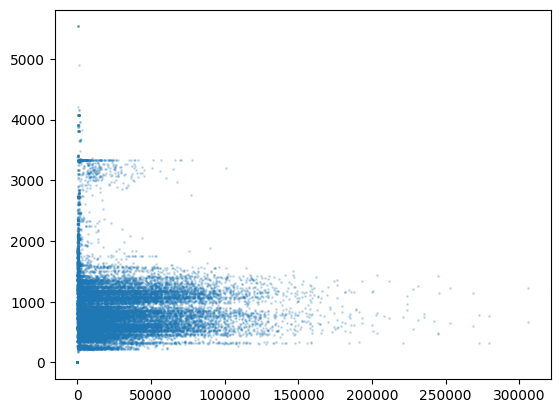

In [22]:
new_list = [values for key, values in  unitary_prices.items() if key in services]

massive = reduce(lambda x, y: x + y, new_list)

y = [value[0] for value in massive]
x = [value[1] for value in massive]

plt.scatter(x, y, alpha=0.2,  s=1)

In [23]:
# Calculo de promedio de raciones

# total_paga = total_pagado.drop(columns=['RBD'])
# total_paga = total_paga.sum().sum()
# cant_raciones_totales = raciones.drop(columns=['RBD'])
# cant_raciones_totales = cant_raciones_totales.sum().sum()

# print(f"Cantidad total de raciones 2019: {cant_raciones_totales}")
# print(f"Cantidad total pagada 2019: {total_paga}")
# print(f"Promedio de precio por ración 2019: {total_paga/cant_raciones_totales}")

In [24]:
# Cantidad raciones 2020 vs Cantidad raciones 2019
parent_folder = 'Data'
folder = 'Raciones'
folder2 = 'Precios'
path = os.path.join(parent_folder, folder, 'Raciones_totales.xlsx')
path2 = os.path.join(parent_folder, folder2, 'Precios_CAN.xlsx')
path3 = os.path.join(parent_folder, folder2, 'Precios_noCan.xlsx')

data2020raciones = pd.read_excel(path)
data2020precios1 = pd.read_excel(path2)
data2020precios2 = pd.read_excel(path3)

data2020precios1 = data2020precios1.drop(columns=['RBD'])
data2020precios2 = data2020precios2.drop(columns=['RBD'])
total_paga2 = data2020precios1.sum().sum() + data2020precios2.sum().sum()

data2020raciones = data2020raciones.drop(columns=['RBD'])
total = data2020raciones.sum().sum()

print(f"Cantidad total de raciones 2020: {total}")
print(f"Cantidad total pagada 2020: {total_paga2}")
print(f"Promedio de precio por ración 2020: {total_paga2/total}")

Cantidad total de raciones 2020: 675108587
Cantidad total pagada 2020: 1147756806382.25
Promedio de precio por ración 2020: 1700.1069583229134


In [25]:
# Cantidad total raciones 2019 < 2020

660764579 < 675108587

True

In [26]:
parent_folder = 'Data'
folder = 'Raciones'
path = os.path.join(parent_folder, folder, 'Raciones_totales_2019.xlsx')

raciones.to_excel(path, index=False)

In [27]:
raciones.head()

,O,D,A,C,T,DCO,S/I,ACO,DCE,ACE,UT_2019,empresa,RBD
0,0,36979,37174,0,6275,0,0,0,0,0,3,86.400.400-8,2419
1,19988,62809,60170,0,29591,0,0,0,0,0,3,86.400.400-8,11287
2,56000,28000,31500,28000,0,0,0,0,0,0,2,86.400.400-8,887864
3,0,60160,67310,0,23919,0,0,0,0,0,4,96.565.270-1,8325
4,0,0,0,0,0,0,0,0,0,0,-1,-1,887991


### Sum raciones y precio

In [28]:
print(np.all(raciones.drop('empresa', axis=1).max()*10 < 2**64))
print(np.all(total_pagado.max()*10 < 2**64))

True
True


In [29]:
raciones['raciones_sum'] = raciones.drop(['RBD', 'UT_2019', 'empresa'], axis=1).sum(axis=1)
total_pagado['pagado_sum'] = total_pagado.drop('RBD', axis=1).sum(axis=1)

In [30]:
sum_df = pd.merge(raciones[['raciones_sum', 'RBD', 'UT_2019', 'empresa']], total_pagado[['pagado_sum', 'RBD']], on='RBD')


### Data Ruteo

In [31]:
folder = 'Solution1'
file_path = 'colegios_final.csv'

path = os.path.join(folder, file_path)
ruteo = pd.read_csv(path)

In [32]:
ruteo['value']

0        84209
1        82549
2        80863
3       101653
4        73857
         ...  
8929     74449
8930     74574
8931     74322
8932     74787
8933     78015
Name: value, Length: 8934, dtype: int64

In [33]:
ruteo.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'indice', 'RBD', 'UTE',
       'Region', 'Nombre', 'Direccion', 'Comuna', 'Provincia', 'closest',
       'value', 'geometry', 'x', 'y', 'prob', 'Aristas'],
      dtype='object')

In [34]:
raciones_con_ruteo = sum_df.join(ruteo[['RBD', 'value', 'UTE', 'Region', 'x', 'y']].set_index('RBD'), on='RBD', how='left')


In [35]:
raciones_con_ruteo.head()

,raciones_sum,RBD,UT_2019,empresa,pagado_sum,value,UTE,Region,x,y
0,80428,2419,3,86.400.400-8,7.285524e+07,84209,3,6,32062129572,621262608817
1,172558,11287,3,86.400.400-8,1.532670e+08,82549,3,6,30835597943,620399707399
2,143500,887864,2,86.400.400-8,2.345281e+08,80863,2,6,34955724103,624115140951
3,151389,8325,4,96.565.270-1,1.259057e+08,101653,4,10,21244355161,534801176765
4,0,887991,-1,-1,0.000000e+00,73857,4,7,26522400054,602996674240


In [36]:
data_sum_x_ut = raciones_con_ruteo[raciones_con_ruteo['UT_2019'] != -1]

In [37]:
data_sum_x_ut = data_sum_x_ut[['raciones_sum', 'pagado_sum', 'value', 'empresa']].groupby(by=['empresa']).sum()


In [38]:
print(np.all(data_sum_x_ut.max() < 2**64))
print(np.all(data_sum_x_ut.max() < 2**64))

True
True


In [39]:
len(data_sum_x_ut)

29

In [40]:
import math
corrs = []
r2s = []
from sklearn.linear_model import LinearRegression

for i in range(1, 200):
    alpha = i*10
    data_sum_x_ut['pagado_ajustado_log'] = ((data_sum_x_ut['pagado_sum'] - alpha*data_sum_x_ut['value'])/data_sum_x_ut['raciones_sum']) #.apply(lambda x: np.log(x))

    model = LinearRegression()
    tot = data_sum_x_ut['raciones_sum'].values.reshape(-1, 1)
    PR = data_sum_x_ut['pagado_ajustado_log'].values.reshape(-1, 1)
    model.fit(X=tot, y=PR)
    r_2 = model.score(tot, PR)
    r2s.append(r_2)

    corr_coef = np.corrcoef(data_sum_x_ut['raciones_sum'], data_sum_x_ut['pagado_ajustado_log'])[1,0]
    corrs.append(corr_coef)


In [41]:
print(np.argmax(r2s))

73


In [42]:
data_sum_x_ut['pagado_sin_ajuste'] = data_sum_x_ut['pagado_sum']/data_sum_x_ut['raciones_sum']
data_sum_x_ut['pagado_ajustado'] = (data_sum_x_ut['pagado_sum'] - 10*data_sum_x_ut['value'] )/data_sum_x_ut['raciones_sum']
len(data_sum_x_ut)

29

## 3. Análisis de costos de escala

# 3.1 Regresión simple

Se establece una regresión linear preliminar, para analizar posibles problemas.

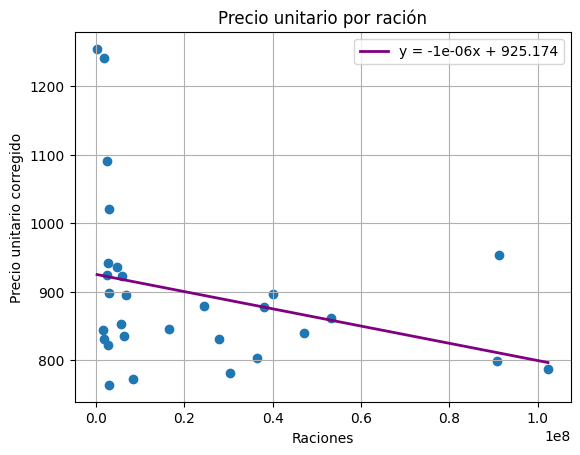

In [43]:
model = LinearRegression()
tot = data_sum_x_ut['raciones_sum'].values.reshape(-1, 1)
PR = data_sum_x_ut['pagado_ajustado'].values.reshape(-1, 1)
model.fit(X=tot, y=PR)
m = model.coef_[0][0]
b = model.intercept_[0]

x = np.linspace(min(tot), max(tot), 100)
y = m * x + b
plt.scatter(tot, PR)
plt.plot(x, y, label=f'y = {round(m,6)}x + {round(b,3)}', color='Purple', linewidth=2.0)

plt.xlabel('Raciones')
plt.ylabel('Precio unitario corregido')
plt.grid(True)
plt.legend()
plt.title(f'Precio unitario por ración');

In [44]:
print(m)
print(b)

-1.2579238148388987e-06
925.1740331230139


In [45]:
# Análisis estadistico para ver la calidad de la regresión
df = pd.DataFrame({'raciones_sum': data_sum_x_ut['raciones_sum'], 'pagado_ajustado': data_sum_x_ut['pagado_ajustado']})
modelo = smf.ols('pagado_ajustado ~ raciones_sum', data=df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        pagado_ajustado   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.751
Date:                Mon, 18 Dec 2023   Prob (F-statistic):              0.109
Time:                        16:03:03   Log-Likelihood:                -178.51
No. Observations:                  29   AIC:                             361.0
Df Residuals:                      27   BIC:                             363.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      925.1740     27.936     33.118   

Veamos si los datos siguen una distribucicion normal antes y despues de restar los costos logisticos a la respuesta. Esto se hace
Con el fin de validar el trabajo que realizamos previamente.

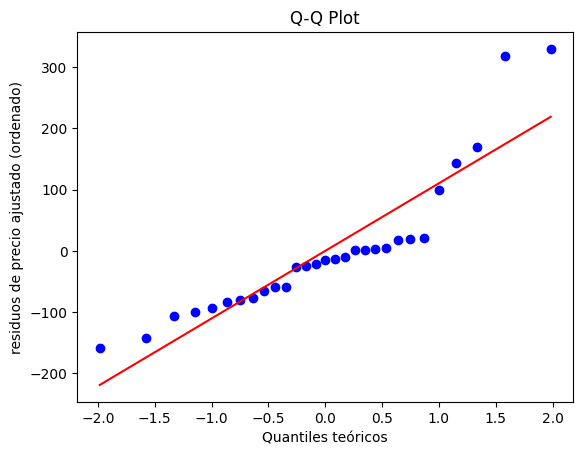

In [46]:
residuals = np.array(modelo.resid).flatten()

probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Quantiles teóricos')
plt.ylabel('residuos de precio ajustado (ordenado)')
plt.title('Q-Q Plot')
plt.show()

Obtenemos un gráfico que no muestra normalidad de los datos

### 3.2 Análisis de regresión con pesos

In [47]:
# Bajo supuesto, los residuos internamente estudentizados cumplen que stud_residuals_i ~ N(0,1)

y = np.array(data_sum_x_ut['pagado_ajustado']).reshape(-1,1)
x = np.array(data_sum_x_ut['raciones_sum']).reshape(-1,1)
X = sm.add_constant(x) # añade columna de 1

lm = LinearRegression(fit_intercept=False)
lm.fit(X,y)

pred = lm.predict(X)
residuals = y - pred

n, p = X.shape
mse_resid = np.sum(residuals**2) / (n - p)
H = X @ np.linalg.inv(X.T @ X) @ X.T

denominator = np.sqrt(mse_resid * (1 - np.diagonal(H))).reshape(-1,1)
stud_residuals = np.divide(residuals, denominator)

Text(0.5, 1.0, 'Residuos internamente studentizados vs cantidad de raciones')

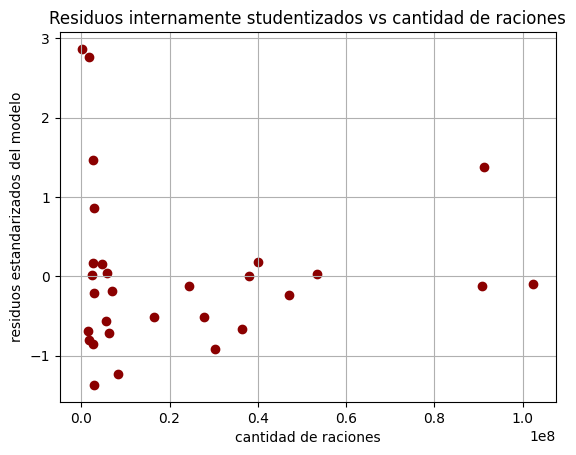

In [48]:
plt.scatter(x=x, y=stud_residuals, color='darkred')
plt.grid()
plt.xlabel('cantidad de raciones')
plt.ylabel('residuos estandarizados del modelo')
plt.title('Residuos internamente studentizados vs cantidad de raciones')

Observamos que la varianza decrece a medida que aumenta el numero de raciones. Es prudente implementar un modelo de minimos cuadrados ponderados.

In [54]:
x = data_sum_x_ut[['raciones_sum']]
y = data_sum_x_ut['pagado_ajustado']

# Fit a model to estimate the residuals
model_ols = sm.OLS(y, sm.add_constant(x)).fit()
residuals = model_ols.resid

# Model the relationship between variance and predictor variable
# You can choose a different functional form based on your observations
variance_model = sm.OLS(np.abs(residuals), sm.add_constant(x)).fit()
predicted_variance = variance_model.predict(sm.add_constant(x))

# Create weights based on the inverse of the predicted variance
weights = 1.0 / np.sqrt(predicted_variance)

# Fit a WLS model
wls_model = sm.WLS(y, sm.add_constant(x), weights=weights)

# Fit the model
wls_results = wls_model.fit()

# Print the summary
print(wls_results.summary(alpha=0.05))

                            WLS Regression Results                            
Dep. Variable:        pagado_ajustado   R-squared:                       0.113
Model:                            WLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3.427
Date:                Mon, 18 Dec 2023   Prob (F-statistic):             0.0751
Time:                        16:22:50   Log-Likelihood:                -177.37
No. Observations:                  29   AIC:                             358.7
Df Residuals:                      27   BIC:                             361.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          921.6046     27.879     33.057   

Igualmente no se obtiene significancia con $\alpha = 0.05$ para la pendiente. 

## 4. Conclusión

Debido a que no fue posible conseguir parámetros significativos ni normalidad de los datos, se opta por considerar una aproximación por mínimos cuadrados ordinarios. Utilizaremos la recta de mínimos cuadrados que se muestra en el apartado 3.1